## Simple Linear Rregression on Fuel Consumption Rating

## Import libraries 

In [2]:
#Import libraries 
import pandas as pd 
import pylab as pl 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0



## Reading the data file 

In [19]:
data = pd.read_csv("FuelConsumption.csv")

#Lets take a look at the starting 10 rows of the dataset 
data.head(10)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,FUELCONSUMPTION_HWY\t,FUELCONSUMPTION_COMB\t,FUELCONSUMPTION_COMB_MPG\t,CO2_EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


## Data Exploration

Lets first see if how many rows and columns are there

In [20]:
data.shape

(1071, 13)

In [21]:
#Checking for any missing values 

data.isna().sum()

MODEL                         0
MAKE                          0
MODEL.1                       0
VEHICLE CLASS                 0
ENGINE SIZE                   0
CYLINDERS                     0
TRANSMISSION                  0
FUEL                          0
FUEL CONSUMPTION              0
FUELCONSUMPTION_HWY\t         0
FUELCONSUMPTION_COMB\t        0
FUELCONSUMPTION_COMB_MPG\t    0
CO2_EMISSIONS                 0
dtype: int64

<p> There are no missing values present. We are good to go </p>

In [33]:
#Summarize the data 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MODEL,1071.0,2014.000000,0.000000,2014.0,2014.0,2014.0,2014.00,2014.0
ENGINE SIZE,1071.0,3.342577,1.415778,1.0,2.0,3.4,4.30,8.4
CYLINDERS,1071.0,5.788049,1.797425,3.0,4.0,6.0,8.00,12.0
FUEL CONSUMPTION,1071.0,13.285901,4.106325,4.6,10.2,12.6,15.60,30.2
FUELCONSUMPTION_HWY,1071.0,9.467694,2.788940,4.9,7.5,8.8,10.70,20.5
FUELCONSUMPTION_COMB,1071.0,11.572082,3.484679,4.7,9.0,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1071.0,26.464052,7.473465,11.0,21.0,26.0,31.00,60.0
CO2_EMISSIONS,1071.0,256.116713,63.530627,108.0,207.0,251.0,294.00,488.0


Lets select some feature  to explore and analyse

In [26]:
data.columns = data.columns.to_series().apply(lambda x: x.strip())

In [35]:
df = data[["ENGINE SIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2_EMISSIONS"]]
df.head(10)

,ENGINE SIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2_EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


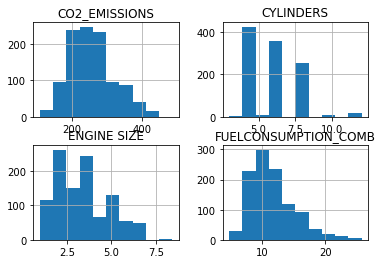

In [41]:
viz = df[['CYLINDERS',"ENGINE SIZE","CO2_EMISSIONS",'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now lets plot each of these features vs Emission, to see how linear is their relation.

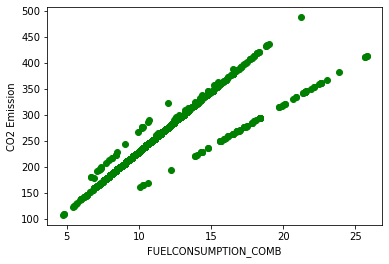

In [42]:
#Plotting a scatter plot
plt.scatter(df.FUELCONSUMPTION_COMB,df.CO2_EMISSIONS, color = "green")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 Emission")
plt.show()

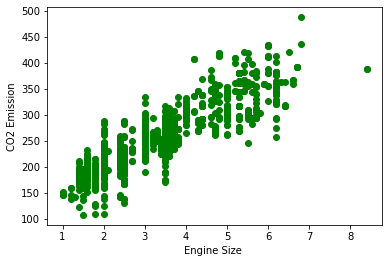

In [47]:
plt.scatter(df["ENGINE SIZE"], df.CO2_EMISSIONS, color ="green")
plt.xlabel("Engine Size ")
plt.ylabel("CO2 Emission")
plt.show()

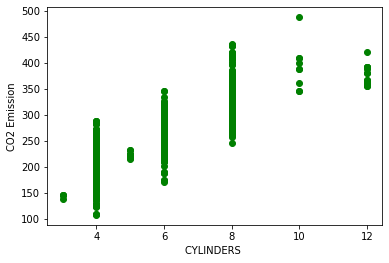

In [49]:
plt.scatter(df["CYLINDERS"], df.CO2_EMISSIONS, color ="green")
plt.xlabel("CYLINDERS ")
plt.ylabel("CO2 Emission")
plt.show()

In [50]:
#Creating train/test split

msk = np.random.rand(len(data)) < 0.8
train = df[msk]
test = df[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

## Train data distribution 

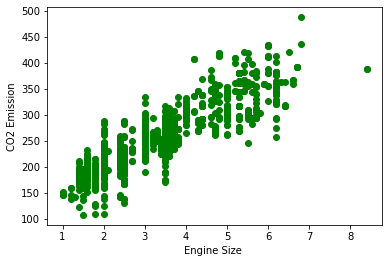

In [51]:
plt.scatter(df["ENGINE SIZE"], df.CO2_EMISSIONS, color ="green")
plt.xlabel("Engine Size ")
plt.ylabel("CO2 Emission")
plt.show()

## Modeling 

Using sklearn package to model data

In [57]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
train_x = np.asanyarray(train[["ENGINE SIZE"]])
train_y = np.asanyarray(train[["CO2_EMISSIONS"]])
lm.fit(train_x,train_y)

#The coefficients 
print ('Coefficients: ',lm.coef_)
print ("Intercepts: ",lm.intercept_)

Coefficients:  [[39.56751688]]
Intercepts:  [123.86369981]


### Plot output

we can plot the fit line over the data 

Text(0, 0.5, 'Emission')

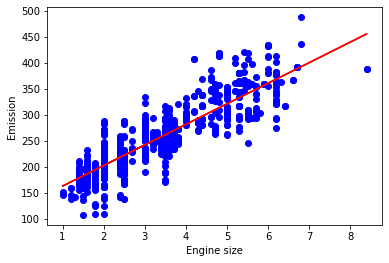

In [60]:
plt.scatter(train["ENGINE SIZE"], train.CO2_EMISSIONS,  color='blue')
plt.plot(train_x,lm.coef_[0][0]*train_x + lm.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 

<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>


In [62]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINE SIZE"]])
test_y = np.asanyarray(test[["CO2_EMISSIONS"]])
test_y_hat = lm.predict(test_x)

print("Mean absolute error: %2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.364437
Residual sum of squares (MSE): 860.53
R2-score: 0.71
